In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
from scipy.interpolate import interp1d
import warnings; warnings.filterwarnings('ignore')
plt.rc('axes', lw =2); plt.rc('font',family = 'serif'); plt.rc('text', usetex = True)

In [150]:
h = 0.6711

In [151]:
df = pd.read_csv('./linear_pk.txt', delim_whitespace = True, header = None, skiprows = 7)
df.columns = ['k','Pk']

In [152]:
def powerlaw(k,n):
    return k**n

k_eval = np.linspace(df['k'].min(),0.01,1000)

0.016875


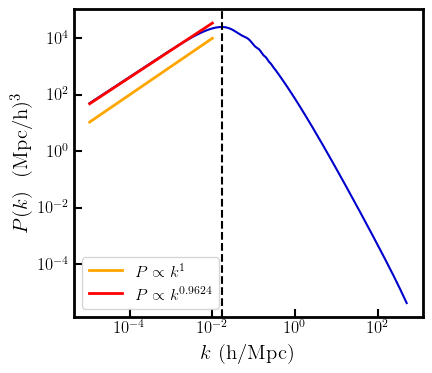

In [186]:
plt.figure(figsize = (4.5,4))
plt.plot(df.k,df.Pk, color = 'mediumblue')
plt.plot(k_eval, 1e6*powerlaw(k_eval, 1), label = '$P \propto k^{1}$', lw = 2, color = 'orange')
plt.plot(k_eval, 2.9e6*powerlaw(k_eval, 0.9624), label = '$P \propto k^{0.9624}$', color = 'red',lw=2)
plt.yscale('log'); plt.xscale('log')
plt.xlabel('$k$ (h/Mpc)', fontsize = 15); plt.ylabel(r'$P(k)$ \ (Mpc/h)$^3$', fontsize = 15)

peak = df['k'].iloc[np.argmax(df['Pk'])]
plt.axvline(peak, color = 'black',ls = '--')#, label = '$k_{eq}$ (approximate)')
plt.legend(loc = 'lower left', fontsize = 12.)


ax = plt.gca()

ax.tick_params(which =  'major', direction = 'in', length = 6, width = 1.5, labelsize = 12)
ax.tick_params(which =  'minor', direction = 'in', length = 3, width = 1.25, labelsize = 12)
ax.minorticks_on()
plt.savefig('./LinearPowerSpectrum.pdf',bbox_inches = 'tight')
print(peak)

In [190]:
df['Tk'] = np.sqrt(df['Pk'] / powerlaw(df['k'],0.9624))

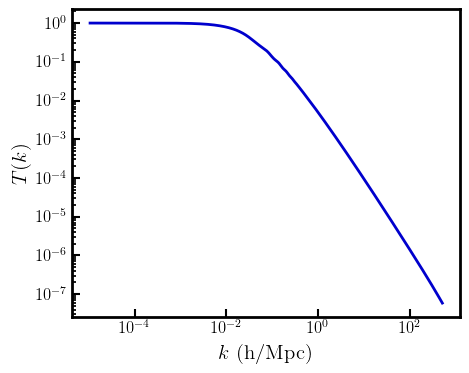

In [191]:
plt.figure(figsize = (5,4))

normalization = (np.mean(df['Tk'][df['k'] < 1e-4]))
df['Tk_normalized'] = df['Tk'] / normalization

plt.plot(df['k'],df['Tk_normalized'], color = 'mediumblue', lw = 2)
plt.yscale('log'); plt.xscale('log')
plt.xlabel('$k$ (h/Mpc)', fontsize = 15); plt.ylabel(r'$T(k)$', fontsize = 15)




ax = plt.gca()
ax.tick_params(which =  'major', direction = 'in', length = 6, width = 1.5, labelsize = 12)
ax.tick_params(which =  'minor', direction = 'in', length = 3, width = 1.25, labelsize = 12)
ax.minorticks_on()
plt.savefig('./TransferFunction.pdf',bbox_inches = 'tight')

## Calculating $\sigma_8$

In [192]:
interpolator = interp1d(df.k,df.Pk)

In [193]:
def tophat_filter(k, R):
    wtilde = 3 * (k*R)**-3 * (np.sin(k*R) - (k*R) * np.cos(k*R))
    return wtilde

In [194]:
def mass_Variance_integrand(k):
    R = 8 
    wtilde_squared = tophat_filter(k,R)**2 
    integrand = (1/(2*np.pi**2)) * interpolator(k) * wtilde_squared * k**2 
    return integrand 

k_i = 0 
k_f = 100
result = quad(mass_Variance_integrand,k_i,k_f)
np.sqrt(result[0])

0.8335710428343668